In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# https://pypi.org/project/yfinance/
import yfinance as yf
import random
from datetime import datetime
import os
import json

sns.set_style('whitegrid') # background
get_ipython().magic(u'matplotlib inline')

## Fetch data

In [94]:
stonks_df = pd.read_csv('stonks.csv')
stonk_tickers = stonks_df['STOCK SYMBOL'].dropna().tolist()
stonk_tickers = [t for t in stonk_tickers if not t.startswith('TSE:')]

# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# (optional, default is '1mo')

# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
# (optional, default is '1d')

data = yf.download(
    " ".join(stonk_tickers), 
    group_by='Ticker', 
    period='1y', 
    interval='1d')

# reassign stonk tickers
stonk_tickers = data.columns.levels[0].tolist()

[*********************100%***********************]  30 of 30 completed

4 Failed downloads:
- RBOT: No data found for this date range, symbol may be delisted
- XIU: No data found for this date range, symbol may be delisted
- HBLK: No data found, symbol may be delisted
- CYBR.B: No data found, symbol may be delisted


## Preview Data

In [95]:
print(stonk_tickers)

['RBOT', 'XIU', 'HBLK', 'CYBR.B', 'TM', 'BUZZ', 'F', 'BYND', 'FSLY', 'FWONK', 'CRWD', 'U', 'NKE', 'AAPL', 'LIT', 'WMT', 'COUR', 'DDOG', 'SMH', 'LMND', 'AMD', 'HMC', 'TWLO', 'DELL', 'SONY', 'WORK', 'ZEN', 'BB', 'MSFT', 'ATVI']


In [96]:
data.head()

RBOT                                  XIU                 \
                    Open High Low Close Adj Close Volume Open High Low Close   
Date                                                                           
2020-07-17 00:00:00  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN   
2020-07-20 00:00:00  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN   
2020-07-21 00:00:00  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN   
2020-07-22 00:00:00  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN   
2020-07-23 00:00:00  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN   

                     ...        MSFT                                    \
                     ...         Low       Close   Adj Close    Volume   
Date                 ...                                                 
2020-07-17 00:00:00  ...  201.389999  202.880005  200.934448  31635300   
2020-07-20 00:00:00  ...  203.009995  211.600006  209.570831  36884800   
2020-07-21 00:00:00  ...  208.029999  208.750000  206.748154  37990400   
2020-07-22 00:00:00  ...  208.389999  211.750000  209.719360  49605700   
2020-07-23 00:00:00  ...  202.149994  202.539993  200.597687  67457000   

                          ATVI                                              \
                          Open       High        Low      Close  Adj Close   
Date                                                                         
2020-07-17 00:00:00  79.410004  79.849998  77.949997  78.639999  78.261070   
2020-07-20 00:00:00  79.070000  81.370003  78.680000  81.160004  80.768929   
2020-07-21 00:00:00  81.650002  81.830002  79.620003  80.760002  80.370857   
2020-07-22 00:00:00  80.970001  81.379997  80.419998  81.099998  80.709213   
2020-07-23 00:00:00  81.489998  82.669998  79.379997  79.610001  79.226395   

                              
                      Volume  
Date                          
2020-07-17 00:00:00  6241500  
2020-07-20 00:00:00  5556400  
2020-07-21 00:00:00  5495800  
2020-07-22 00:00:00  2937400  
2020-07-23 00:00:00  5963000  

[5 rows x 180 columns]

### Single Stonk Analysis

In [111]:
# Select a random stonk from tickers
stonk_ticker = random.choice(stonk_tickers)
print(stonk_ticker)
stonk = yf.Ticker(stonk_ticker)
stonk.info

COUR


{'zip': '94041',
 'sector': 'Consumer Defensive',
 'fullTimeEmployees': 779,
 'longBusinessSummary': 'Coursera, Inc. operates an online educational content platform that connects learners, educators, and institutions. It offers online courses that include data science, business, computer science, information technology, health, social sciences, logic, project management, and digital marketing services; campus student plans; degree courses; and certification education. Coursera, Inc. was formerly known as Dkandu, Inc. and changed its name to Coursera, Inc. in April 2012. The company was incorporated in 2011 and is based in Mountain View, California.',
 'city': 'Mountain View',
 'phone': '650 963 9884',
 'state': 'CA',
 'country': 'United States',
 'companyOfficers': [],
 'website': 'http://www.coursera.org',
 'maxAge': 1,
 'address1': '381 East Evelyn Avenue',
 'fax': '650 265 2681',
 'industry': 'Education & Training Services',
 'ebitdaMargins': -0.20698999,
 'profitMargins': -0.21695,

In [112]:
dirname = "./stonks/{}".format(stonk_ticker)
if not os.path.exists(dirname):
    os.makedirs(dirname)

In [113]:
with open("{}/data.json".format(dirname), 'w') as fp:
    json.dump(stonk.info, fp)

In [100]:
# single stock dataframe
ssdf = data[stonk_ticker]

ssdf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


### Daily closing price

<function matplotlib.pyplot.show(close=None, block=None)>

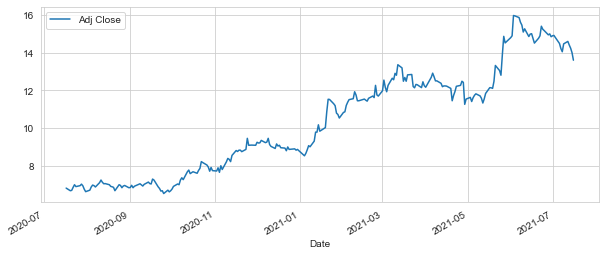

In [77]:
ssdf['Adj Close'].plot(legend=True, figsize=(10,4))
plt.show

### Total daily volume

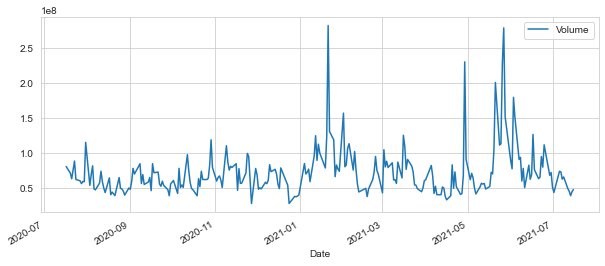

In [78]:
ssdf['Volume'].plot(legend=True, figsize=(10,4))
plt.show()

### Moving average of closing price

In [79]:
# Calculate the moving average of the stock
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days"%(str(ma))

    ssdf[column_name] = ssdf['Adj Close'].rolling(window=ma).mean()

/Users/aperkslabbe/opt/anaconda3/envs/stonk_analysis/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


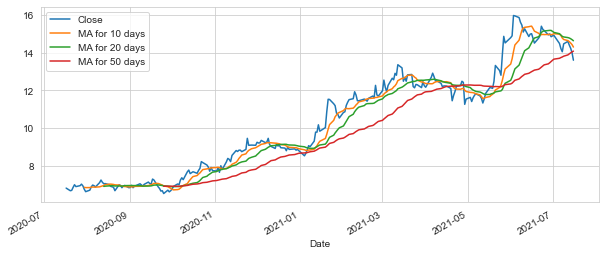

In [80]:
ssdf[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
plt.show()

### Daily Returns

/Users/aperkslabbe/opt/anaconda3/envs/stonk_analysis/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


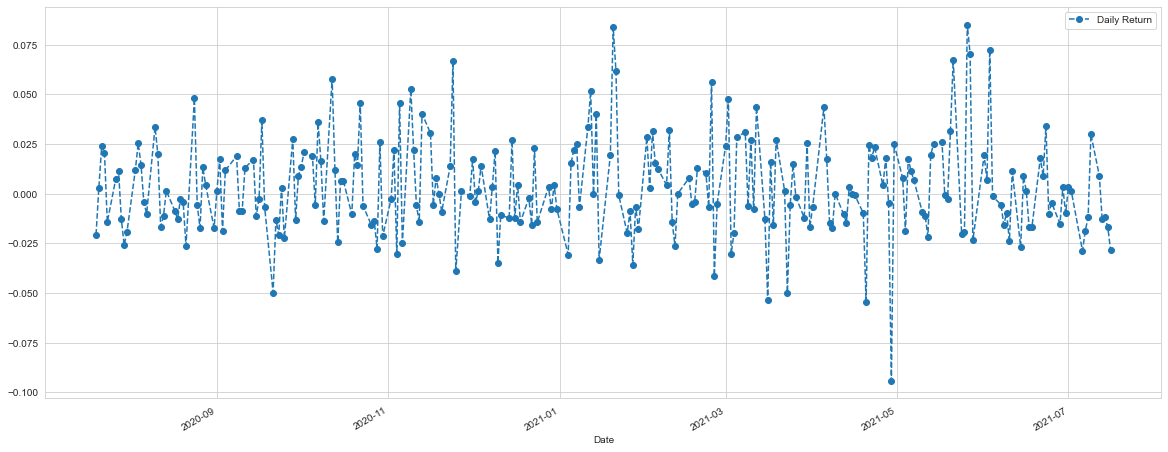

In [81]:
# Analyse daily returns of stonk
ssdf['Daily Return'] = ssdf['Adj Close'].pct_change()
ssdf['Daily Return'].plot(figsize=(20, 8), legend=True, linestyle='--', marker='o')
plt.show()

### Avg daily return of the last year

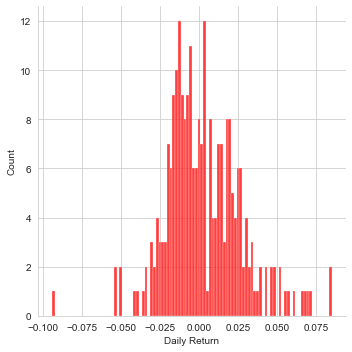

In [82]:
sns.displot(ssdf['Daily Return'].dropna(), bins=100, color='red')
plt.show()

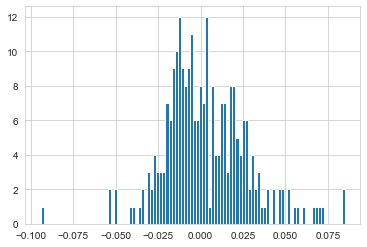

In [83]:
ssdf['Daily Return'].hist(bins=100)
plt.show()

### Value at risk

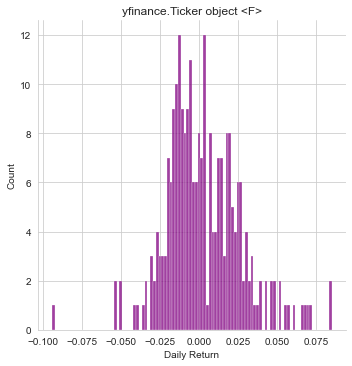

In [84]:
sns.displot(ssdf['Daily Return'].dropna(), bins=100, color='purple')
plt.title(stonk)
plt.show()